In [1]:
# HOME
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
# use seaborn plotting defaults
import seaborn as sns; sns.set()

# get the code
import sys
sys.path.append('../codeCNV')
from cluster import center_data

home = '/Users/mahtin'
# home = '/Users/martinscience'
# standard paths
testdata = os.path.join(home,"Dropbox/Icke/Work/somVar/testdata")
static_path = os.path.join(home, "Dropbox/Icke/Work/static")
cluster_path = os.path.join(home, "mount")
tooldata = os.path.join(home, "Dropbox/Icke/Work/somVar/tooldata")

# load the config
# edit config directly in yaml file
config_file = '../config/config_devel.yaml'
import yaml
with open(config_file) as file:
    # The FullLoader parameter handles the conversion from YAML
    # scalar values to Python the dictionary format
    config = yaml.load(file, Loader=yaml.FullLoader)['CNV']['cluster']
# 
cnvdata = os.path.join(tooldata, "myCNVdata")
output_path = os.path.join(cnvdata, "output")

# the path to the input data
cnv_path = os.path.join(cnvdata, "cnv")
cnvPON_path = cnv_path = os.path.join(cnvdata, "chromCov")
cnv_path = os.path.join(cluster_path, "scratch/develop/PONcoverage/cnv")
cnvPON_path = os.path.join(cluster_path, "scratch/develop/PONcoverage/chromCov")

In [ ]:
cnvPON_path

## get the coverage and SNP data

In [2]:
sample = "01_A"
snp_df = pd.read_csv(os.path.join(output_path, f'cluster/{sample}.dbscan.csv'), sep='\t')

In [3]:
snp_df

,Chr,Pos,FullExonPos,ExonPos,log2ratio,log2ratiomean,log2ratiomeanDiff,Depth,EBscore,VAF,absVAF,deltaVAF,absVAFmean,absVAFmeanDiff,VAFstd,VAFstdDiff,deltaVAFvar,deltaVAFvarDiff,deltaVAFstd,deltaVAFstdDiff,dbscan
0,chr1,1054900,37368,37368,-0.069236,0.346636,3.945632e-03,147.0,0.044,0.421769,0.156462,0.056079,0.310983,0.0,0.178631,0.0,0.042368,0.0,0.205834,0.0,0
1,chr1,1055000,37468,37468,-0.066106,0.346110,3.457801e-03,98.0,0.919,0.489796,0.020408,0.068027,0.310983,0.0,0.178631,0.0,0.042368,0.0,0.205834,0.0,0
2,chr1,1055037,37505,37505,-0.031916,0.346188,3.524551e-03,86.0,0.840,0.476744,0.046512,0.013052,0.310983,0.0,0.178631,0.0,0.042368,0.0,0.205834,0.0,0
3,chr1,1071823,37706,37706,0.337613,0.346937,3.793557e-03,109.0,0.007,0.532110,0.064220,0.055366,0.310983,0.0,0.178631,0.0,0.042368,0.0,0.205834,0.0,0
4,chr1,1291377,55139,55139,0.242629,0.247084,8.714793e-10,182.0,1.818,0.445055,0.109890,0.087055,0.310983,0.0,0.178631,0.0,0.042368,0.0,0.205834,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24009,chrX,156023260,49469650,1835187,-0.667568,0.212712,0.000000e+00,25.0,0.950,0.880000,0.760000,0.023226,0.155058,0.0,0.141056,0.0,0.015260,0.0,0.123530,0.0,0
24010,chrX,156023266,49469656,1835193,-0.655721,0.212684,0.000000e+00,25.0,0.930,0.880000,0.760000,0.000000,0.155058,0.0,0.141056,0.0,0.015260,0.0,0.123530,0.0,0
24011,chrX,156024203,49469886,1835423,0.148033,0.211628,0.000000e+00,53.0,0.392,0.132075,0.735850,0.747925,0.155058,0.0,0.141056,0.0,0.015260,0.0,0.123530,0.0,0
24012,chrX,156024239,49469922,1835459,0.160322,0.211463,0.000000e+00,56.0,0.203,0.267857,0.464286,0.135782,0.155058,0.0,0.141056,0.0,0.015260,0.0,0.123530,0.0,0


## run the code

In [4]:
center_df = center_data(snp_df, config)
center_df.loc[snp_df['Chr'] != "chrX", 'log2ratiomean'].mean()

GMM using 25 inits: center size 19545 meanVAF = 0.46 meanCov=-0.0
log2ratio centered around -0.00016856474094117374


0.00449029600671226

## center SNP and cov data using GMM
+ #### first, the center cluster has to be fitted via clustering to identify the centers for mean correction
+ #### chrX seems to have different log2ratio (maybe adjusted for XX and XY)

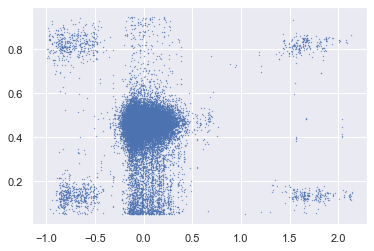

In [5]:
plt.scatter(snp_df['log2ratiomean'], snp_df['VAF'], s=.1);

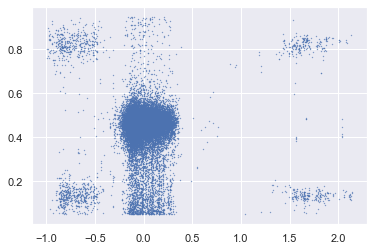

In [6]:
merge = snp_df.query('Chr != "chrX"').query('0.05 < VAF < 0.95 and log2ratiomean == log2ratiomean')
plt.scatter(merge['log2ratiomean'], merge['VAF'], s=.1);

+ #### GMM clustering runs best for fitting the center mass
    * clusters vary depending on init clusters

,log2ratiomean,VAF
0,0.346805,0.421769
1,0.346279,0.489796
2,0.346357,0.476744
3,0.347105,0.532110
4,0.247253,0.445055
...,...,...
23522,0.245224,0.475862
23523,0.304075,0.476923
23524,0.300531,0.403509
23525,0.300908,0.472527


19544
19531
19545
22158
19526


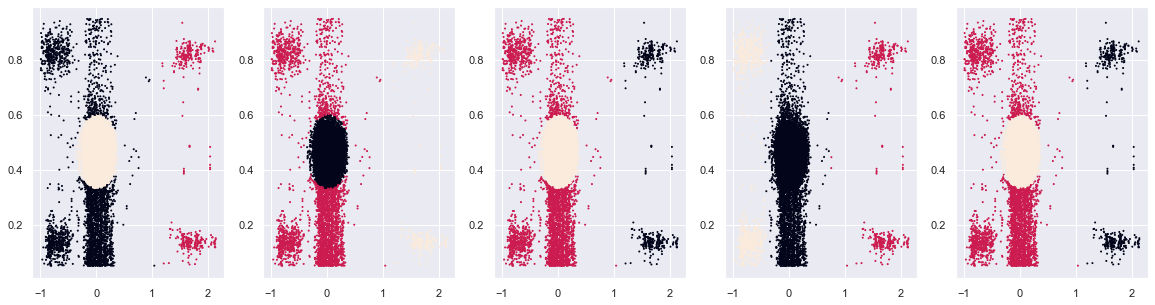

In [9]:
from sklearn.mixture import GaussianMixture as GMM

X = merge[['log2ratiomean', 'VAF']]
X
choice = range(5)
fig, axes = plt.subplots(1, len(choice), figsize=(20,5))
for i, components in enumerate(choice):
    gmm = GMM(n_components=3, covariance_type='diag', n_init=2)
    labels = gmm.fit_predict(X)
    _, counts = np.unique(labels, return_counts=True)
    print(np.max(counts))
    _ = axes[i].scatter(X['log2ratiomean'], X['VAF'], c=labels, s=1)
    # print(f'{components} components - AIC:', gmm.aic(X))
    # print(f'{components} components - BIC:', gmm.bic(X))

+ increasing n_init to 20 does the job:

19545
19531
19545
19545
19546


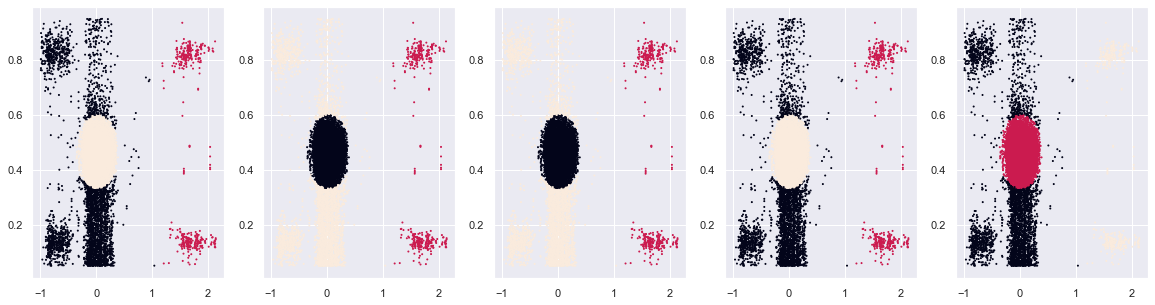

In [10]:
choice = range(5)
fig, axes = plt.subplots(1, len(choice), figsize=(20,5))
for i, components in enumerate(choice):
    gmm = GMM(n_components=3, covariance_type='diag', n_init=25)
    labels = gmm.fit_predict(X)
    _, counts = np.unique(labels, return_counts=True)
    print(np.max(counts))
    _ = axes[i].scatter(X['log2ratiomean'], X['VAF'], c=labels, s=1)
    # print(f'{components} components - AIC:', gmm.aic(X))
    # print(f'{components} components - BIC:', gmm.bic(X))

+ get_centers computes the means from the best fit centers

In [ ]:
def get_centers(merge_df, runs=25, comps=3, VAF_limits=(0.05, 0.95), exclude_X=True):
    '''
    use GMM to identify the center cluster and get the means from that
    because GMM occasionally does not identify the center cluster,
    I let the GMM proceed several times and minimize the center cluster
    next, the center cluster can be identified as the maximum center
    '''
    VAFmin, VAFmax = VAF_limits
    # fit the centers to the data 
    if exclude_X:
        merge_df = merge_df.query('Chr != "chrX"')     
    X = merge_df.query('@VAFmin < VAF < @VAFmax and log2ratiomean == log2ratiomean')[['log2ratiomean', 'VAF']]

    gmm = GMM(n_components=comps, covariance_type='diag', n_init=runs).fit(X)
    labels = gmm.predict(X)
    # get the size of the 
    _, counts = np.unique(labels, return_counts=True)
    maxcount = np.max(counts)
    centers = pd.DataFrame(gmm.means_, columns=['log2ratio', 'VAF'])
    # get mean_cov and meanVAF from largest cluster
    meanCov, meanVAF = centers.loc[np.argmax(counts)]
    size = maxcount
            
    print(f'GMM using {runs} inits: center size {size} meanVAF = {round(meanVAF, 2)} meanCov={round(meanCov, 2)}')
    
    return meanCov, meanVAF, centers

In [ ]:
meanCov, meanVAF, centers = get_centers(merge)
meanVAF

In [ ]:
config = {
    'debug': False, # also export the left and right rolling window values (L/R)
    'coverage': {
        'filter': dict(
            min_cov = 30,
            min_PON_cov = 50,
            max_PON_std = 100,
        ),
        'normalize':False,
        'center': True,
        'expand':0.2, # after interpolation of rolling data from filtered df into full df, interpolate missing data within this fraction of window size, set 0 if no interpolation is wanted
        'data': {
            'log2ratio': {
                'mean':100
            }
        }
    },
    'heteroSNP': {
        'filter': dict(
            VAF=(0.05,0.95),
            minDepth=30,
            minEB=0.5
        ),
        'normalize': True,
        'center':False,
        'expand': 0.5,
        'data': {
            'absVAF': {
                'sum': 20
            },
            'VAF': {
                'std': 20
            },
            'deltaVAF': {
                'std': 20
            }
        }
    }
}


def center_data(snp_df, config):
    '''
    retrieve the centers for scaling using GMM
    '''
    
    meanCov, meanVAF, _ = get_centers(snp_df, VAF_limits=config['heteroSNP']['filter']['VAF'])
    # center coverage 
    if config['coverage']['center']:
        print("log2ratio centered around", meanCov)
        snp_df.loc[:, 'log2ratiomean'] = snp_df['log2ratiomean'] - meanCov
    if config['heteroSNP']['center']:
        print("heteroSNP centered around", meanVAF)
        snp_df.loc[:, 'VAF'] = snp_df['VAF'] - meanVAF + 0.5
    return snp_df

In [ ]:
snp_df = center_data(snp_df, config)
snp_df.query('log2ratiomean != log2ratiomean')